First we will load a 100 images to test the preprocessing speed

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage
import glob 
import os 
import random
import numpy as np
import pandas as pd
from PIL import ImageFile
from sklearn.model_selection import train_test_split

#what is the role of truncated images?
ImageFile.LOAD_TRUNCATED_IMAGES = True



In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, Sequential, models
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.applications import efficientnet, vgg16

The preprocessing below works. It has been commented out to replace it with a better one. 

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# def preprocess_image(image):
#     resized = cv.resize(image,(300,300),interpolation = cv.INTER_AREA)
#     img = cv.medianBlur(resized,5)
#     ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
#     th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
#             cv.THRESH_BINARY,11,2)
#     th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,15,2)
#     images = [th1, th2, th3, img]

    
#     return images
    

In [5]:
def preprocess_image_improved(image,reshape_size):
    if image.shape == (570, 1015, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[250:-100,100:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,50)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,13,3)
        (T, thresh1) = cv.threshold(resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        return images
    
    elif image.shape == (582, 1034, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[60:500,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,50)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,13,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        return images
    
    elif image.shape == (624, 1200, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[150:,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,100,100)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        return images
    
    #EL PORTO IMAGES FOR GOOD ARE FAILING SYSTEMATICALLY
    elif image.shape == (624, 1110, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[350:-100,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,250)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,9,5)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/250
        images[1] = images[1]/250
    
        return images
    
    
    #WE HAVE THROWN ALL OF THOSE IN HERE FOR NOW  
    else:
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[150:,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,100,100)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        
        return images

In [53]:
del X_test , X_train , y_test , y_train

NameError: ignored

The code below is a clue from Nicole about what can we do to fix X shape.

Let's augment the little data we have. Considering the nature of the data heavy rotations are not advised.

In [8]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     featurewise_center = False,
#     featurewise_std_normalization = False,
#     rotation_range = 10,
#     width_shift_range = 0.1,
#     height_shift_range = 0.1,
#     horizontal_flip = True,
#     zoom_range = (0.8, 1.2),
#     #I added brightness changes, I think they are relevant to our task
#     brightness_range =(0.5,1)
#     ) 

In [9]:
# INPUT_SHAPE = (4, 250, 250)
NUMBER_CLASSES = 3

In [42]:
X.shape
y_cat = to_categorical(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30)
del X
del y_cat

The model below works with the first preprocessing, there seem to be some serious issues when trying to apply any kind of max pooling though.

In [139]:
def initialize_basic():
    #Create an empty template
    model = models.Sequential()
    
    model.add(layers.Conv2D(16, (3,3), input_shape= (50,50,8), padding='same', activation="relu"))
    
    model.add(layers.MaxPool2D(pool_size=(2,2),padding = "same"))

    model.add(layers.Conv2D(32, (2,2), padding = "same",activation="relu")) 
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(3, activation = "softmax"))
    return model


In [140]:
def compile_model(model, learning_rate=1e-4):
    model.compile(loss = "categorical_crossentropy",
                            optimizer = Adam(learning_rate=learning_rate),
                            metrics = ["accuracy"])
    return model

In [121]:
test_model = initialize_basic()

In [122]:
test_model = initialize_basic()
model = compile_model(test_model)


In [66]:
del all_files

In [ ]:
all_files = []
idx = 0
for root , dirs , files in os.walk("/content/drive/MyDrive/Colab Notebooks/raw_data"):
      if dirs:
          parent = root
          folders = dirs
          print(folders)

      if files:
          for file in files:
            path = os.path.join("/content/drive/MyDrive/Colab Notebooks/raw_data" , folders[idx] , file)
            all_files.append(path)
          idx += 1
all_files[:20]

In [75]:
len(all_files)

525

In [76]:
random.sample

<bound method Random.sample of <random.Random object at 0x33b3210>>

In [148]:
labels = dict(Chaotic=0,Flat=2,Good=1)

def get_chunk(all_files , chunk_size = 50):
  import random
  random.shuffle(all_files)
  idx = 1
  while True:
    chunk_files = all_files[chunk_size*(idx-1):chunk_size*idx]

    if len(chunk_files) == 0:
      break

    X = []
    y = []
    for file in chunk_files:
      try:
        original_image = plt.imread(file)                      
        original_image = preprocess_image_improved(original_image,50)
                  
        if len(original_image) < 2:
            print(f"problemita in {file}")
        else:
            X.append(np.array(original_image).T)
            folder_name = file.split("/")[-2]
            label = labels.get(folder_name)
            y.append(label)
      except Exception:
        print("BAD FILE")
        continue
    X = np.array(X)
    y = np.array(y)
    yield X , y
    idx += 1
        

data_gen = get_chunk(all_files)
#X.shape , y.shape

In [116]:
#X , y = next(X)

In [149]:
es = EarlyStopping(patience = 3,restore_best_weights= True)

In [133]:
test_model

In [154]:
data_gen = get_chunk(all_files , chunk_size = 150)

test_model = initialize_basic()
model = compile_model(test_model)

for X , y in data_gen:
  print("FETCHING NEXT CHUNK")
  #print(X)
  print(X.shape , y.shape)
  y_cat = to_categorical(y)
  model.fit(X , y_cat ,
                callbacks = [es] ,
                 validation_split = 0.2, 
                 epochs = 25 , 
                 batch_size = 256)
  del X , y
  

FETCHING NEXT CHUNK
(150, 50, 50, 8) (150,)
Epoch 1/25
1/1 [==============================] - 1s 649ms/step - loss: 1.1265 - accuracy: 0.3250 - val_loss: 1.2496 - val_accuracy: 0.2333
Epoch 2/25
1/1 [==============================] - 0s 51ms/step - loss: 1.0320 - accuracy: 0.4417 - val_loss: 1.0693 - val_accuracy: 0.5000
Epoch 3/25
1/1 [==============================] - 0s 58ms/step - loss: 0.9347 - accuracy: 0.6167 - val_loss: 1.0386 - val_accuracy: 0.5333
Epoch 4/25
1/1 [==============================] - 0s 40ms/step - loss: 0.8878 - accuracy: 0.5833 - val_loss: 1.0708 - val_accuracy: 0.5333
Epoch 5/25
1/1 [==============================] - 0s 40ms/step - loss: 0.8366 - accuracy: 0.6667 - val_loss: 1.1372 - val_accuracy: 0.4333
Epoch 6/25
1/1 [==============================] - 0s 45ms/step - loss: 0.8002 - accuracy: 0.6417 - val_loss: 1.1475 - val_accuracy: 0.4333
BAD FILE
FETCHING NEXT CHUNK
(149, 50, 50, 8) (149,)
Epoch 1/25
1/1 [==============================] - 39s 39s/step - los

In [155]:
test_model.evaluate(X_test,y_test)

NameError: ignored

In [136]:
def initialize_improved():
    #Create an empty template
    model = models.Sequential()
    
    model.add(layers.Conv2D(64, (3,3), input_shape= (300,300,8), padding='same', activation="relu"))
    #Max pooling layers have been creating some problems. I am playing with the padding argument to solve the dimensions issue.
    #model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    model.add(layers.MaxPool2D(pool_size=(2,2),padding="valid"))
    #Second convolutional layer 
    model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    
    model.add(layers.Flatten())
    
    #Deep learning layers
    #model.add(layers.Dense(64, activation = "relu"))
    #model.add(layers.Dense(32, activation = "relu"))
    model.add(layers.Dense(300, activation = "relu"))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Dense(3, activation = "softmax"))
    return model

def compile_model(model, learning_rate=1e-4):
    model.compile(loss = "categorical_crossentropy",
                            optimizer = Adam(learning_rate=learning_rate),
                            metrics = ["accuracy"])
    return model


In [58]:
improved_model = initialize_improved()
compile_model(improved_model)

ResourceExhaustedError: ignored

In [ ]:
improved_model

In [52]:
es = EarlyStopping(patience = 3,restore_best_weights= True)
improved_model.fit(X_train , y_train ,callbacks = [es] ,validation_split = 0.2, epochs = 64, batch_size = 64)

Epoch 1/64


ResourceExhaustedError: ignored

In [ ]:
improved_model.evaluate(X_test,y_test)

5/5 [==============================] - 1s 273ms/step - loss: 0.8998 - accuracy: 0.5924


[0.8997514843940735, 0.5923566818237305]

In [ ]:
test_image  = plt.imread("test_images/test_2")


FileNotFoundError: [Errno 2] No such file or directory: 'test_images/test_2'

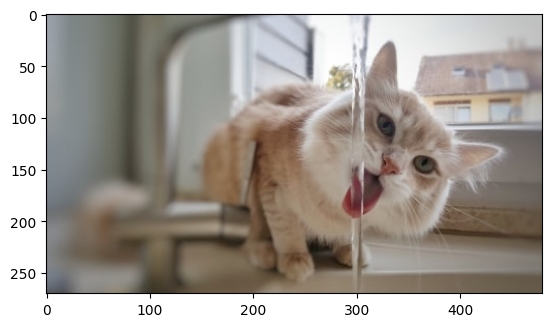

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image = preprocess_image_improved(test_image,300)
test_image = np.array([(test_image)])
test_image = test_image.reshape(1,300,300,8)

In [ ]:
test_model.predict(test_image)

1/1 [==============================] - 0s 44ms/step


array([[0.1588735, 0.2730595, 0.5680671]], dtype=float32)

In [ ]:
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
improved_model.predict(test_image)

1/1 [==============================] - 0s 80ms/step


array([[0.24275489, 0.02381151, 0.73343354]], dtype=float32)